In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


In [3]:

data = pd.read_csv('/home/trang/Downloads/case_study.csv')

# 1
print('data before: ', data.shape)

data = data.dropna(subset=['merchant'])

print('data after: ', data.shape)

print(data.groupby('merchant').count().index)

data before:  (300000, 8)
data after:  (279621, 8)
Index(['Bách Hóa Online', 'Bảo hiểm', 'Dịch vụ', 'Ebook', 'Gia dụng',
       'Laptop & PC', 'Làm đẹp - Sức khỏe', 'Máy ảnh & Phụ kiện', 'Mẹ và Bé',
       'Nhà cửa đời sống', 'Promotion', 'Quà Lưu Niệm', 'Sách Tiếng Anh',
       'Sách Tiếng Việt', 'Thiết bị IT', 'Thiết bị số - Phụ kiện số',
       'Thể Thao & Dã Ngoại', 'Thời trang', 'Tivi - Audio', 'VAS',
       'Voucher - Dịch vụ', 'Văn phòng phẩm', 'Xe máy, ô tô, xe đạp',
       'Điện lạnh', 'Điện thoại - Máy tính bảng'],
      dtype='object', name='merchant')


/home/trang/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# 2
print('total by action type: ', data.groupby('action_type').count()['fullVisitorid'])
data['date'] = data['interaction_time'].astype('datetime64[ns]').dt.date
data['hour'] = data['interaction_time'].astype('datetime64[ns]').dt.hour
print('total by acion type, date and hour: ', data.groupby(['date','hour','action_type']).count()['fullVisitorid'])
date_hour_counts = data.groupby(['date','hour','action_type']).count()['fullVisitorid']
date_hour_counts = date_hour_counts.reset_index()

total by action type:  action_type
3    234471
6     45150
Name: fullVisitorid, dtype: int64
total by acion type, date and hour:  date        hour  action_type
2018-09-10  0     3               745
                  6               108
            1     3               278
                  6                50
            2     3               146
                                 ... 
2018-09-19  21    6               262
            22    3              1602
                  6               268
            23    3              1012
                  6               154
Name: fullVisitorid, Length: 479, dtype: int64


In [5]:
### 3
columns = ['fullVisitorid', 'interaction_time', 'productSKU', 'action_type']
start_time = '2018-01-01'
end_time = '2018-10-01'

data[columns].sort_values(columns)
data[['fullVisitorid', 'interaction_time', 'productSKU', 'action_type']].groupby(['fullVisitorid', 'interaction_time', 'productSKU'])['action_type'].nunique().sort_values(ascending=False)
total_user = data[(data['interaction_time'] >= start_time) & (data['interaction_time'] <= end_time)]['fullVisitorid'].nunique()
add_to_cart_user = data[(data['action_type'] == 3) & (data['interaction_time'] >= start_time) & (data['interaction_time'] <= end_time)]['fullVisitorid'].nunique()
abandonment_rate = round(add_to_cart_user*100 / total_user)
abandonment_rate

91

In [41]:
#4.
# I don't think there is any relation between abandonment_rate and merchant
add_to_cart_dataset = data[(data['action_type'] == 3) & (data['interaction_time'] >= start_time) & (data['interaction_time'] <= end_time)].groupby('merchant').count()['fullVisitorid'].reset_index()
add_to_cart_dataset = add_to_cart_dataset.rename(columns={'fullVisitorid':'number_add_to_cart'})
add_to_cart_dataset

,merchant,number_add_to_cart
0,Bách Hóa Online,14306
1,Dịch vụ,566
2,Gia dụng,5964
3,Laptop & PC,997
4,Làm đẹp - Sức khỏe,21737
5,Máy ảnh & Phụ kiện,1451
6,Mẹ và Bé,14707
7,Nhà cửa đời sống,14840
8,Promotion,89
9,Quà Lưu Niệm,1511


In [53]:
#5. how frequence product/merchant
# ngoài promotion merchant, tất cả những merchant còn lại đều có phần lớn số sản phảm không được mua. Như vậy abadonment_rate vẫn không có quan hệ đến merchant
frequence_dataset = data.groupby('merchant').count()['fullVisitorid'].copy()
frequence_dataset = frequence_dataset.reset_index()
frequence_dataset = frequence_dataset.rename(columns={'fullVisitorid':'total'})

frequence_dataset = frequence_dataset.join(add_to_cart_dataset.set_index('merchant'), on='merchant')
frequence_dataset = frequence_dataset.fillna(0)
frequence_dataset
frequence_dataset['add_to_cart_rate'] = round( frequence_dataset['number_add_to_cart'] * 100 / frequence_dataset['total'])
frequence_dataset

,merchant,total,number_add_to_cart,add_to_cart_rate
0,Bách Hóa Online,16404,14306.0,87.0
1,Bảo hiểm,4,0.0,0.0
2,Dịch vụ,841,566.0,67.0
3,Ebook,17,0.0,0.0
4,Gia dụng,7005,5964.0,85.0
5,Laptop & PC,1053,997.0,95.0
6,Làm đẹp - Sức khỏe,25234,21737.0,86.0
7,Máy ảnh & Phụ kiện,1669,1451.0,87.0
8,Mẹ và Bé,17691,14707.0,83.0
9,Nhà cửa đời sống,17507,14840.0,85.0


In [70]:
#6.
completed_dataset = data[(data['action_type'] == 6) & (data['interaction_time'] >= start_time) & (data['interaction_time'] <= end_time)].groupby('merchant').count()['fullVisitorid'].reset_index()
completed_dataset

,merchant,fullVisitorid
0,Bách Hóa Online,2098
1,Bảo hiểm,4
2,Dịch vụ,275
3,Ebook,17
4,Gia dụng,1041
5,Laptop & PC,56
6,Làm đẹp - Sức khỏe,3497
7,Máy ảnh & Phụ kiện,218
8,Mẹ và Bé,2984
9,Nhà cửa đời sống,2667


Text(0.5, 1.0, 'Amount of Completed Transaction by Date and Hour')

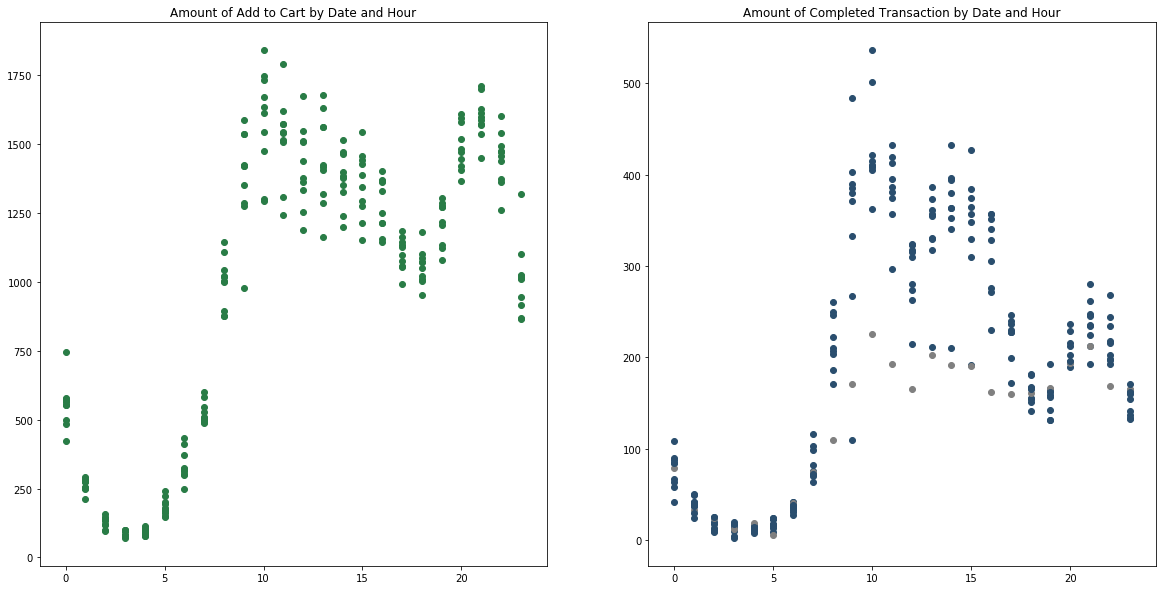

In [9]:
date_hour_counts = date_hour_counts.rename(columns={'fullVisitorid': 'counts'})
date_hour_counts
add_to_cart_counts = date_hour_counts[date_hour_counts['action_type'] == 3]
completed_counts = date_hour_counts[date_hour_counts['action_type'] == 6]
fig = plt.figure(figsize = (20,10))
all_dates = date_hour_counts['date'].drop_duplicates()

plt.subplot(121)
for date in all_dates:
    pick_date = (add_to_cart_counts['date'] == date)
    plt.scatter(add_to_cart_counts[pick_date]['hour'], add_to_cart_counts[pick_date]['counts'], label = date, color='#297C46')
plt.title('Amount of Add to Cart by Date and Hour')


plt.subplot(122)
for date in all_dates:
    pick_date = (completed_counts['date'] == date)
    date_exclude = ['2018-09-16', '2018-08-15']
    colors = 'grey' if date in [ pd.to_datetime(date_ex) for date_ex  in date_exclude ] else '#2A4E6E'
    plt.scatter(completed_counts[pick_date]['hour'], completed_counts[pick_date]['counts'], label = date, color=colors)
plt.title('Amount of Completed Transaction by Date and Hour')

In [71]:
pd.set_option('display.max_rows', 1000)
count_by_source = data.groupby(['source','action_type']).count()['fullVisitorid'].reset_index()
count_by_source = count_by_source.rename(columns={'fullVisitorid': 'counts'})
count_by_source = count_by_source.sort_values(by=['action_type','counts',], ascending=[True, False])
# count_by_source
data

,fullVisitorid,visitId,source,interaction_time,productSKU,action_type,transactionId,merchant,date,hour
0,10796433617570240226,1537231206,FB,2018-09-18 08:05:10,276921,3,NaN,Sách Tiếng Việt,2018-09-18,8
1,3420023669829788288,1537339917,FB,2018-09-19 13:53:09,352156,3,NaN,Sách Tiếng Việt,2018-09-19,13
2,260086599438307401,1536730102,FB,2018-09-12 12:49:53,392955,3,NaN,Làm đẹp - Sức khỏe,2018-09-12,12
3,3156776568682643722,1536885003,FB,2018-09-14 07:30:17,393079,3,NaN,Làm đẹp - Sức khỏe,2018-09-14,7
4,610658073725040936,1536882984,FB,2018-09-14 06:58:34,393079,3,NaN,Làm đẹp - Sức khỏe,2018-09-14,6
...,...,...,...,...,...,...,...,...,...,...
299995,2990176329164352604,1537179402,secureauthentication.apac.citibank.com,2018-09-17 17:17:13,2619763,3,NaN,Mẹ và Bé,2018-09-17,17
299996,2918198166249770969,1537252734,101nhungdieunhalanhdaocanbiet.mcbooks.vn,2018-09-18 13:43:41,3640449,3,NaN,Sách Tiếng Việt,2018-09-18,13
299997,2918198166249770969,1537252734,101nhungdieunhalanhdaocanbiet.mcbooks.vn,2018-09-18 13:44:08,3640453,3,NaN,Sách Tiếng Việt,2018-09-18,13
299998,1029631605158863022,1536807810,[%tp_PublisherName%]_[%tp_SectionName%]_[%tp_P...,2018-09-13 10:03:51,243840,6,2.73547e+08,VAS,2018-09-13,10
